In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
data_white = pd.read_csv('winequality-white.csv',';')
data_red = pd.read_csv('winequality-red.csv', ';')


In [16]:
# add the type of wine where '0' means red wine; '1' means white wine
data_white['type'] = pd.Series(np.ones(len(data_white)))
data_red['type'] = pd.Series(np.zeros(len(data_red)))

In [20]:
data_red.info()
#1599
data_white.info()
#4898
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
type                    1599 non-null float64
dtypes: float64(12), int64(1)
memory usage: 162.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64

In [25]:
data_red.describe()
data_white.describe()
#4898
#print('_'*40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,1.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.0


In [44]:
data = pd.concat([data_red, data_white] )   
data['type'] = data['type'].astype(int)

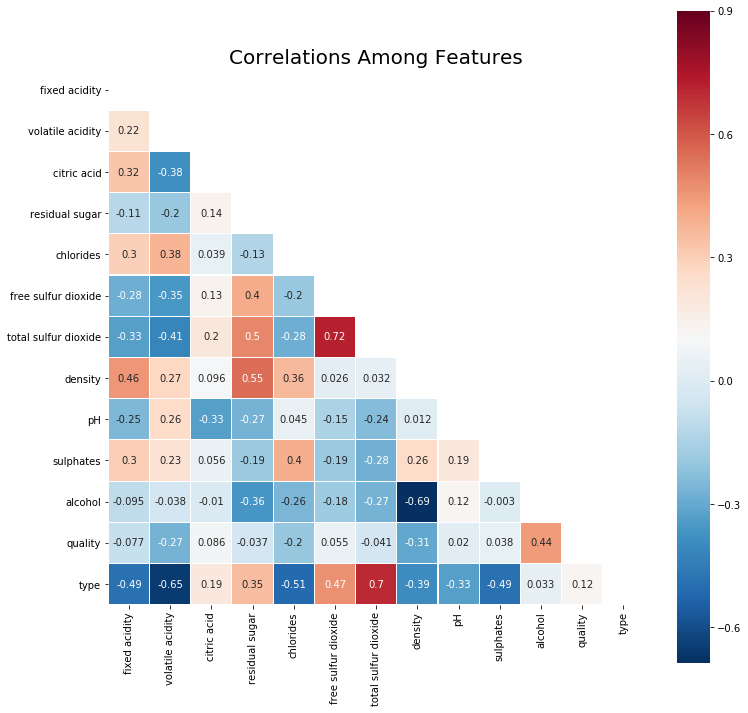

In [65]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

df_train_features = data.drop(['quality','type'], axis =1)
n = 11

x_train, x_test, y_train, y_test = train_test_split(df_train_features, data['type'], test_size=0.1, random_state=7)

x_train_mat = x_train.values.reshape((len(x_train), n))
x_test_mat = x_test.values.reshape((len(x_test), n))

In [49]:
print('Start Predicting...')

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_mat,y_train)
tree_pred = decision_tree.predict(x_test_mat)

rf = RandomForestClassifier()
rf.fit(x_train_mat,y_train)
rf_pred = rf.predict(x_test_mat)

KN = KNeighborsClassifier()
KN.fit(x_train_mat,y_train)
KN_pred = KN.predict(x_test_mat)

Gaussian = GaussianNB()
Gaussian.fit(x_train_mat,y_train)
Gaussian_pred = Gaussian.predict(x_test_mat)

svc = SVC()
svc.fit(x_train_mat,y_train)
svc_pred = svc.predict(x_test_mat)

xgb = xgboost.XGBClassifier()
xgb.fit(x_train_mat,y_train)
xgb_pred = xgb.predict(x_test_mat)

print('...Complete')

Start Predicting...


C:\anaconda\envs\mlp\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\anaconda\envs\mlp\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


...Complete


In [53]:
##############################################################################
# Obtain Accuracy Scores for the test set
##############################################################################
print('Decision Tree:', 'acc: ', accuracy_score(y_test, tree_pred)*100,'%', 'f1_score: ', f1_score(y_test, tree_pred)*100, '%')
print('Random Forest:',  'acc: ',accuracy_score(y_test, rf_pred)*100,'%', 'f1_score: ', f1_score(y_test, rf_pred)*100, '%')
print('KNeighbors:',  'acc: ', accuracy_score(y_test, KN_pred)*100,'%', 'f1_score: ', f1_score(y_test, KN_pred)*100, '%')
print('GaussianNB:',  'acc: ', accuracy_score(y_test, Gaussian_pred)*100,'%', 'f1_score: ', f1_score(y_test, Gaussian_pred)*100, '%')
print('SVC:',  'acc: ', accuracy_score(y_test, svc_pred)*100,'%', 'f1_score: ', f1_score(y_test, svc_pred)*100, '%')
print('XGB:', 'acc: ', accuracy_score(y_test, xgb_pred)*100,'%',  'f1_score: ', f1_score(y_test, xgb_pred)*100, '%' )

Decision Tree: acc:  98.92307692307692 % f1_score:  99.26393270241851 %
Random Forest: acc:  99.53846153846155 % f1_score:  99.68321013727561 %
KNeighbors: acc:  94.61538461538461 % f1_score:  96.31190727081137 %
GaussianNB: acc:  98.0 % f1_score:  98.61554845580405 %
SVC: acc:  96.0 % f1_score:  97.29166666666667 %
XGB: acc:  99.6923076923077 % f1_score:  99.78902953586498 %


In [55]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = xgb, X = x_train_mat, y = y_train, cv = 10)
rfc_eval.mean()

0.993842341678145

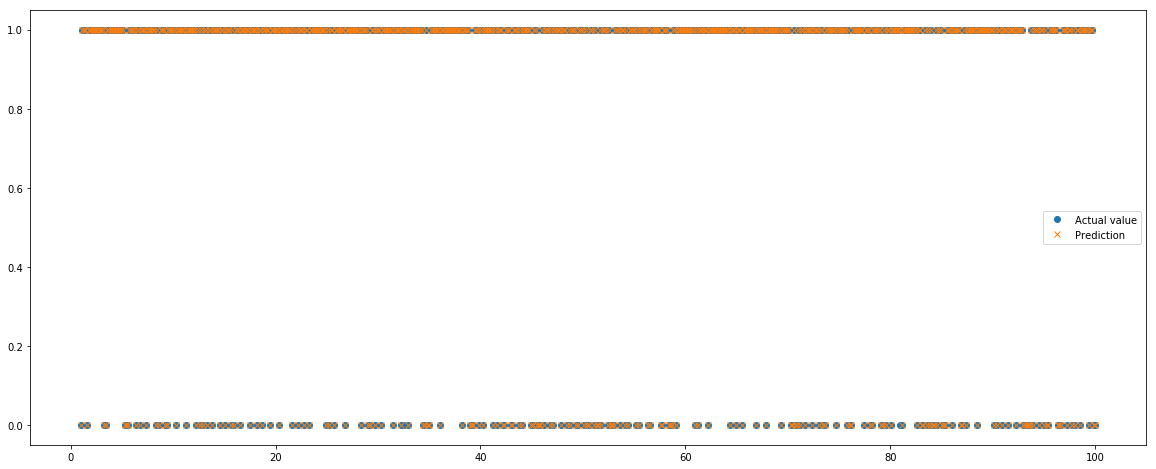

In [62]:
plt.figure(figsize = (20,8))
domain = np.linspace(1,100,len(xgb_pred))
plt.plot(domain, y_test,'o')
plt.plot(domain, xgb_pred,'x')
plt.legend(('Actual value', 'Prediction'))
plt.show()